Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           7043 non-null   object 
 1   SeniorCitizen    7043 non-null   int64  
 2   Dependents       7043 non-null   object 
 3   tenure           7043 non-null   int64  
 4   PhoneService     7043 non-null   object 
 5   MultipleLines    7043 non-null   object 
 6   InternetService  7043 non-null   object 
 7   Contract         7043 non-null   object 
 8   MonthlyCharges   7043 non-null   float64
 9   Churn            7043 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 550.4+ KB
None
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000

C:\Users\fawad\AppData\Local\Temp\ipykernel_5224\342622836.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


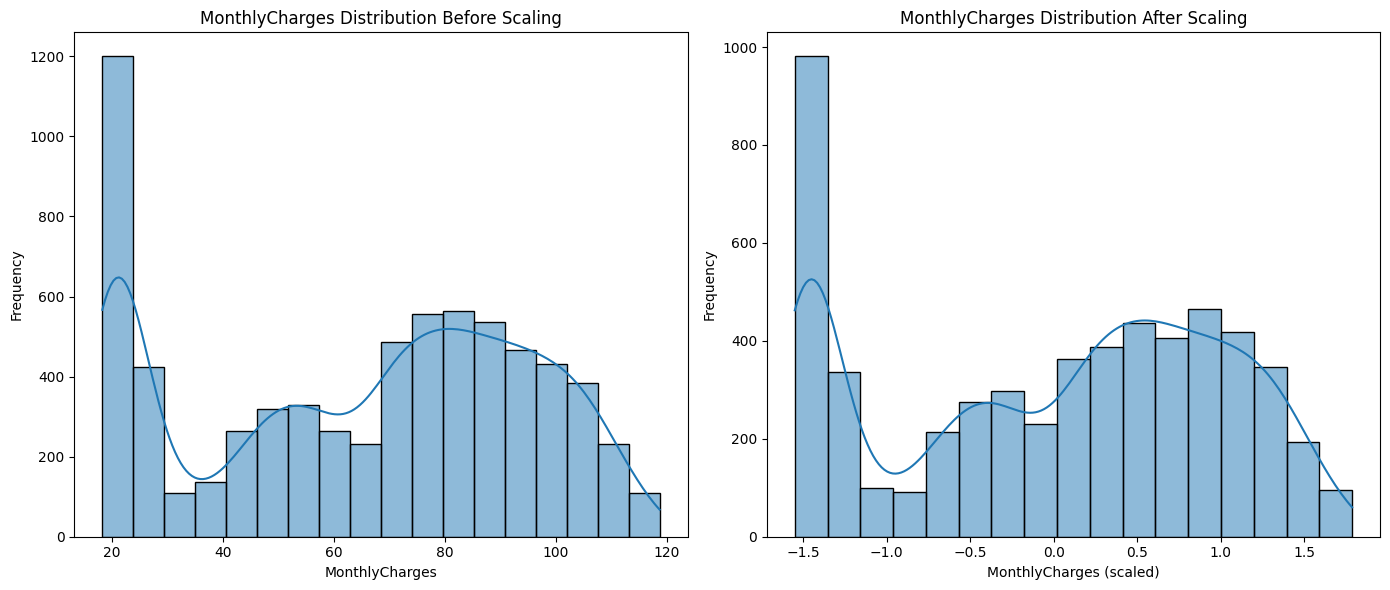

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Reading the dataset from a CSV file
df = pd.read_csv('Dataset (ATS).csv')

# Display basic info about the dataset
# Provides an overview of the dataset: data types, non-null values, memory usage, etc.
print("Initial Data Overview:")
print(df.info())
print(df.describe())

# Data Cleaning: Handling Missing Values
# Check for missing values
# Shows the count of missing values in each column
print("\nMissing Values:")
print(df.isnull().sum())

# Impute missing values (example with forward fill)
# Fills missing values with the preceding value in the column
df.fillna(method='ffill', inplace=True)

# Verify that missing values are handled
# Double-check to ensure no missing values remain
print("\nMissing Values After Imputation:")
print(df.isnull().sum())

# Encode Categorical Variables
# Converts categorical data into numeric data
categorical_cols = ['gender', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'Contract', 'Churn']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Display the first few rows of the dataset after encoding
# Verifies that categorical variables have been converted
print("\nData After Encoding Categorical Variables:")
print(df.head())

# Split the dataset into training and testing sets
# Divides the dataset into training (80%) and testing (20%) sets
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the Data
# Normalizes the feature set to have mean 0 and variance 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display 10 rows of the scaled training data
# Helps visualize the effect of scaling
print("\n10 Rows of Prepared and Normalized Training Data:")
print(pd.DataFrame(X_train_scaled, columns=X.columns).head(10))

# Plotting distributions before and after scaling for a feature (e.g., 'MonthlyCharges')
plt.figure(figsize=(14, 6))

# Plot distribution of 'MonthlyCharges' before scaling
plt.subplot(1, 2, 1)
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title('MonthlyCharges Distribution Before Scaling')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')

# Plot distribution of 'MonthlyCharges' after scaling
plt.subplot(1, 2, 2)
sns.histplot(X_train_scaled[:, X.columns.get_loc('MonthlyCharges')], kde=True)
plt.title('MonthlyCharges Distribution After Scaling')
plt.xlabel('MonthlyCharges (scaled)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
